<a href="https://colab.research.google.com/github/sudo0809/Digit_Recognition_MNIST_Dataset/blob/main/Digit_recognizer_Mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dropout
from keras.layers import Flatten, MaxPool2D, Dense
from keras.utils import plot_model

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# reshaping the data showing that channel dimension in 1 in this case 
X_train = X_train.reshape((X_train.shape[0], 28,28,1))
X_test = X_test.reshape((X_test.shape[0], 28,28,1))

In [5]:
#Declaring total no. of examples 
m = X_train.shape[0]

inputshape = (28,28,1)

In [6]:
#Normalizing the data
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
Y_train = keras.utils.to_categorical(Y_train, num_classes=10)
Y_test = keras.utils.to_categorical(Y_test, num_classes=10)

In [8]:
print(Y_train.shape)

(60000, 10)


## Visualizing the data

In [9]:
X_train[1].shape

(28, 28, 1)

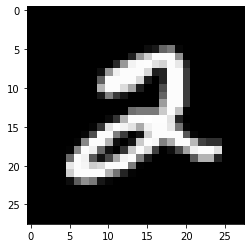

In [10]:
#Write the index below to see the image
idx = 5
plt.imshow(X_train[idx][:,:,0], cmap='gray', interpolation='nearest')

## Creating a Model

In [11]:
model = keras.models.Sequential()


model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu', 
                 data_format='channels_last' , input_shape=inputshape, name="First_Conv"))
model.add(BatchNormalization(name="Norm_1"))


model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu',
                 data_format='channels_last', name="Second_Conv"))
model.add(BatchNormalization(name="Norm_2"))


model.add(MaxPool2D(pool_size=(2,2) ,name="Pool_1"))
model.add(Dropout(0.25, seed=1, name="Drop_1"))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu', name='Forth_Conv'))
model.add(BatchNormalization(name="Norm_4"))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Fifth_Conv'))
model.add(BatchNormalization(name="Norm_5"))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Sixth_Conv'))
model.add(BatchNormalization(name="Norm_6"))

model.add(MaxPool2D(pool_size=(2,2), strides=2, name="Pool_2"))
model.add(Dropout(0.25, seed=1, name="Drop_2"))

model.add(Flatten())
model.add(Dense(512, activation='relu', name="Dense_1"))
model.add(BatchNormalization(name="Norm_7"))

model.add(Dense(256, activation='relu', name="Dense_2"))
model.add(BatchNormalization(name="Norm_8"))
model.add(Dropout(0.25, seed=1, name="Drop_3"))

model.add(Dense(64, activation='relu', name="Dense_3"))
model.add(BatchNormalization(name="Norm_9"))

model.add(Dense(10, activation='softmax', name="Dense_4_Final"))

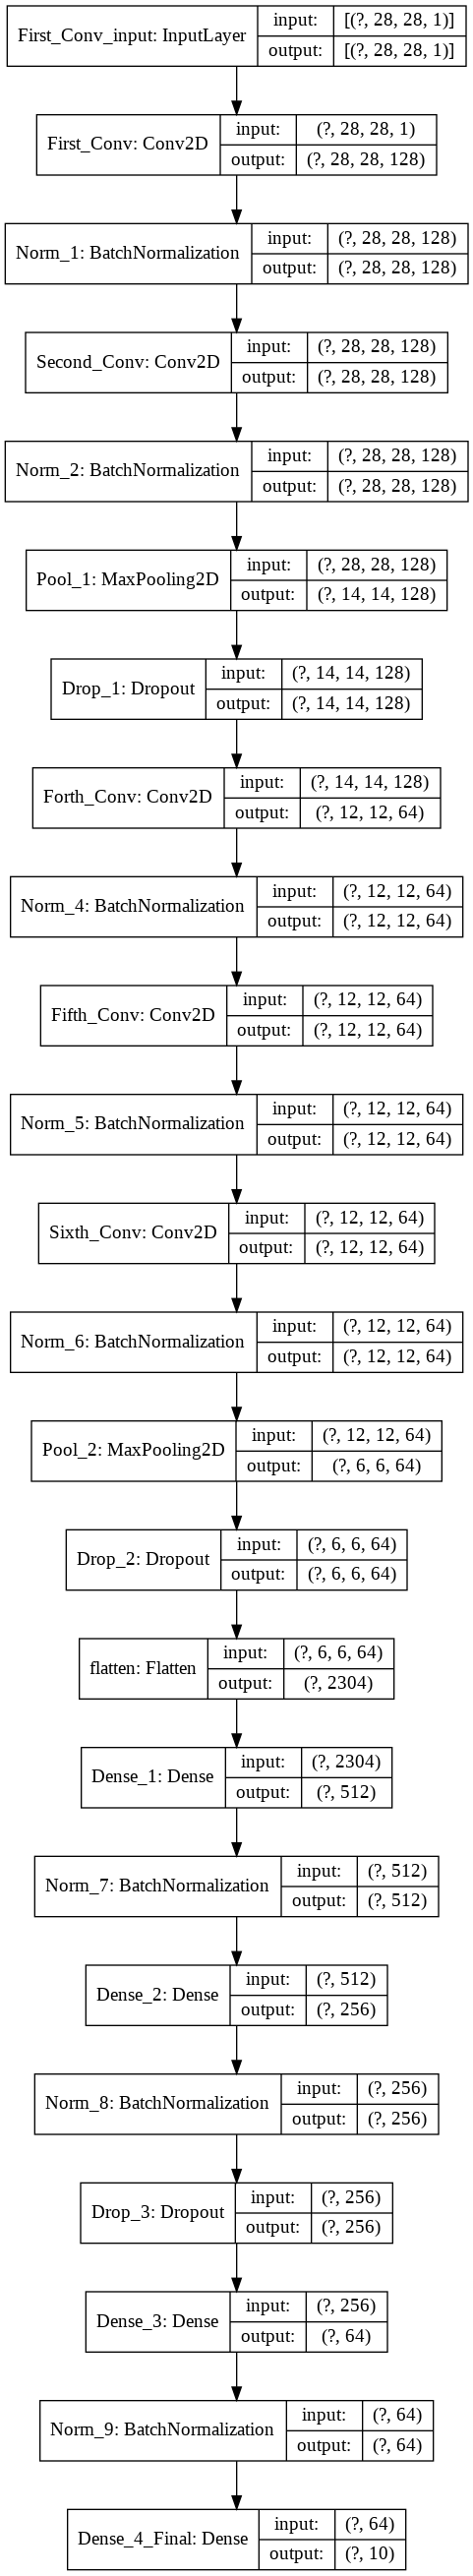

In [12]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

## Compiling and fitting the model

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
MyModel = model.fit(X_train, Y_train, batch_size=128, epochs=40, validation_data=(X_test, Y_test))

Epoch 1/40
469/469 [==============================] - 10s 21ms/step - loss: 0.1424 - accuracy: 0.9570 - val_loss: 0.2232 - val_accuracy: 0.9286
Epoch 2/40
469/469 [==============================] - 10s 20ms/step - loss: 0.0480 - accuracy: 0.9858 - val_loss: 0.0258 - val_accuracy: 0.9907
Epoch 3/40
469/469 [==============================] - 9s 20ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 4/40
469/469 [==============================] - 9s 20ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0238 - val_accuracy: 0.9934
Epoch 5/40
469/469 [==============================] - 9s 20ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0349 - val_accuracy: 0.9890
Epoch 6/40
469/469 [==============================] - 9s 20ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0188 - val_accuracy: 0.9938
Epoch 7/40
469/469 [==============================] - 10s 20ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0362 - val_accuracy: 0.9

In [14]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9954


[0.01953858882188797, 0.9954000115394592]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Conv (Conv2D)          (None, 28, 28, 128)       3328      
_________________________________________________________________
Norm_1 (BatchNormalization)  (None, 28, 28, 128)       512       
_________________________________________________________________
Second_Conv (Conv2D)         (None, 28, 28, 128)       409728    
_________________________________________________________________
Norm_2 (BatchNormalization)  (None, 28, 28, 128)       512       
_________________________________________________________________
Pool_1 (MaxPooling2D)        (None, 14, 14, 128)       0         
_________________________________________________________________
Drop_1 (Dropout)             (None, 14, 14, 128)       0         
_________________________________________________________________
Forth_Conv (Conv2D)          (None, 12, 12, 64)        7

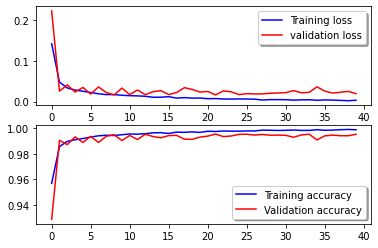

In [16]:
fig, ax = plt.subplots(2,1)
ax[0].plot(MyModel.history['loss'], color='b', label="Training loss")
ax[0].plot(MyModel.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(MyModel.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(MyModel.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Insight of the Tested Data

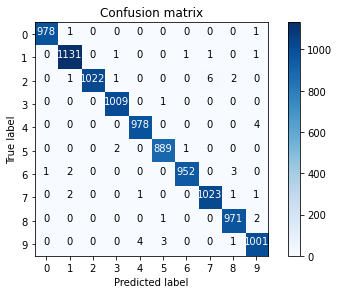

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes) #rotation=45 can be used to rotate the ticks
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

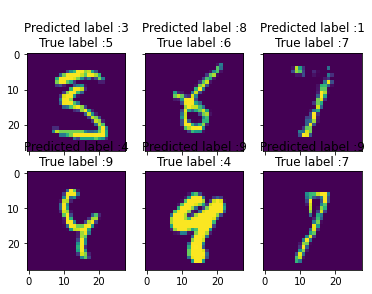

In [18]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, )
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("\nPredicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)